In [3]:
import numpy as np
from functions import *
from system_class import system
import matplotlib.pyplot as plt
import time 
#import qutip as qt
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%load_ext autoreload
%autoreload 2
pi=np.pi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
g= -0.1586*2*pi
w = 7.415*2*pi
#w = 5.401976741795615*2*pi
Ad=0.002*2*np.pi
wd=7.421351*2*np.pi
gamma=0.0014 * 2*np.pi
Omega=0.002 * 2*np.pi

tmax = 1
tint = tmax/300
nsteps = int( tmax / tint - 1 )
times = np.linspace( 0, tmax, nsteps )
nsteps = len( times )

spinx_arr = np.zeros(  nsteps )
spinz_arr = np.zeros(  nsteps )
pop01 = np.zeros(  nsteps )
n_arr = np.zeros(  nsteps) 

s = system(g=g,w=w,wd=wd,gamma=gamma,Ad=Ad,\
           cavity_dim=10, qubit_dim=5, dvice='TRSM1' )
s.set_initial_qb_state([1])
s.set_initial_cs_state( alpha=0 )
#s.set_initial_photon_state()
s.initialise_density_matrix()

[1.0, 0.0, 0.0, 0.0, 0.0]
[0]
Nq, Nc  = 5, 10
w01, wc, wd  =  4.4619,  7.4150,  7.4214 
Ad  =  0.0020 
ah  = -0.2141 
g  = -0.1586 
kappa  =  0.0014 
[0. 1. 0. 0. 0.]
[1]


In [5]:
t1 = time.time()
rhos = s.time_evolve( times )
t2 = time.time()

..........................................................................................................................................................................................................................................................................................................

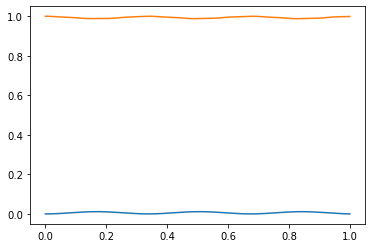

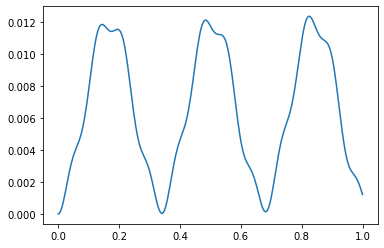

In [6]:
s.save_and_plot( times, rhos, [0,1] )

In [49]:
len(np.array(times))

199

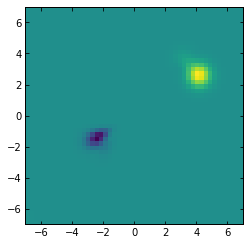

In [105]:
#s = system(d=1,g=0.1,w=1,wd=0,gamma=0, Omega=0, cavity_dim=20 )
#s.set_initial_qb_state([1,0])
##print( qt.displace( s.cavity_dim, 1 ).full() )
#disp_mat_temp = qt.displace( s.cavity_dim, 1 ).full()
#disp_mat = np.kron( s.ide_qb, disp_mat_temp) 
#s.rho = disp_mat.dot(s.rho).dot( np.transpose(disp_mat) ) 

lmin, lmax = -7,7
lambda_list_re = np.linspace( lmin, lmax, 50 )
lambda_list_im = np.linspace( lmin, lmax, 50 )

wigner = s.my_wigner(lambda_list_re, lambda_list_im)

extent = [lmin,lmax,lmin,lmax]
plt.imshow( wigner, extent=extent, origin='lower' )
plt.show()

In [103]:
extent = [lmin,lmax,lmin,lmax]
plt.imshow( wigner, extent=extent, origin='lower' )
plt.show()

NameError: name 'wigner' is not defined

In [106]:
s.expect( s.na )

(24.93121962732264+0j)

In [ ]:

#dims_simulated = []
#for i in range(nb_cav_dim):
#    
#    cavity_dim = 10*( nb_cav_dim_min + i )
#    dims_simulated.append(cavity_dim)
#    
#    s = system(d=wq,g=g,w=w,wd=wd,gamma=gamma, Omega=Omega, cavity_dim=cavity_dim )
#    s.set_initial_qb_state([1,1])
#    print(np.trace( (s.b+s.b_dag).dot( s.rho ) ))
#    sys.exit()
#    
#    t1 = time.time()
#    rhos = s.time_evolve( times )
#    t2 = time.time()
#    print("time=", t2-t1, "cavity_dim=", cavity_dim)
#
#    for j in range(nsteps):
#        spinx_arr[i,j] = np.trace( (s.b+s.b_dag).dot( rhos[j] ) )
#        spinz_arr[i,j] = np.trace( (s.nb).dot( rhos[j] ) )
#        n_arr[i,j] = np.trace( s.na.dot( rhos[j] ) )
#    
#print( s.expect( s.na ) )